<a href="https://colab.research.google.com/github/russderrick/CSC3160-assignment1/blob/main/%E2%80%9CCSC3160_2024_Assignment_1_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (CSC3160/AIR6063)

This is an instruction and template for the first assignment. In this assignment, you will learn how to use tools to extract speech representations.

Should you have any inquiries, please feel free to reach out to the teaching team.

Please follow the template to finish your assignment and submit in GitHub.

## Example: Extracting spectrogram

In [113]:
!pip install torch>=1.2.0     #install torch
!pip install torchaudio       #install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa          #install librosa


Shape of waveform: torch.Size([1, 139421])
Sample rate of waveform: 22050
Shape of resampled_waveform: torch.Size([1, 101168])


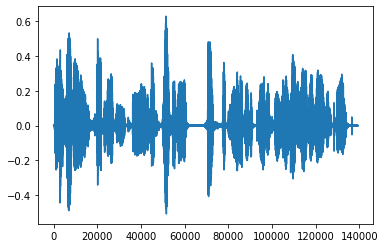

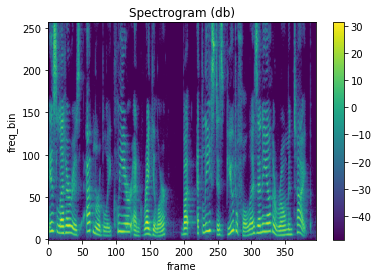

In [ ]:
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 512

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)

# create an object that extract power spectrogram
spec_trans = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec = spec_trans(resampled_waveform)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

print("Shape of resampled_waveform: {}".format(resampled_waveform.size()))

plt.figure()
plt.plot(waveform.t().numpy())

plot_spectrogram(spec[0])


## (1) [20 marks] Extract mel-spectrogram

In this part, you need to extract power spectorgram (FFT 1024) with 5ms, 10ms, 15ms frameshift, with the same window size 30ms. The speech signal is at 16 kHz sampling rate.
* Visualize each of the power spectorgram (FFT 1024)
* Plot the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift



In [114]:
# Write your implementation here
!pip install torch>=1.2.0
!pip install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa


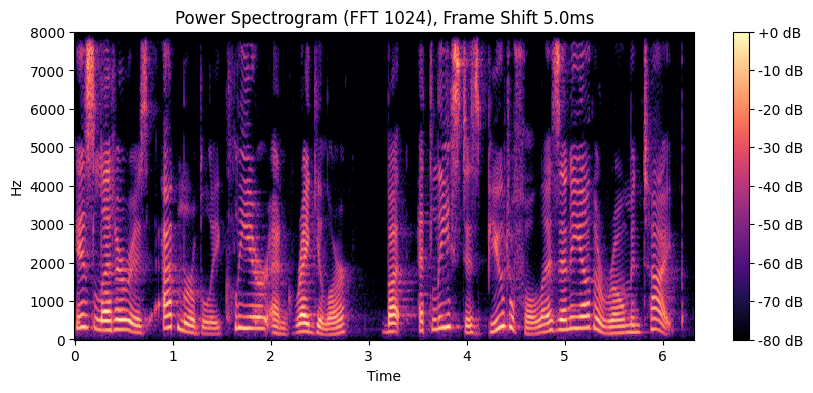

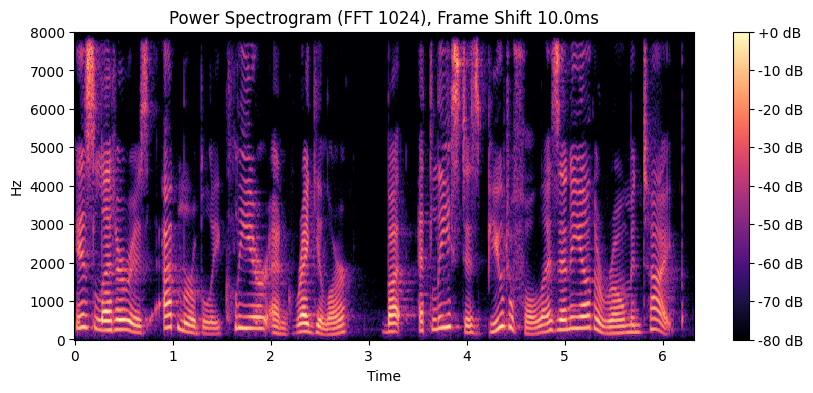

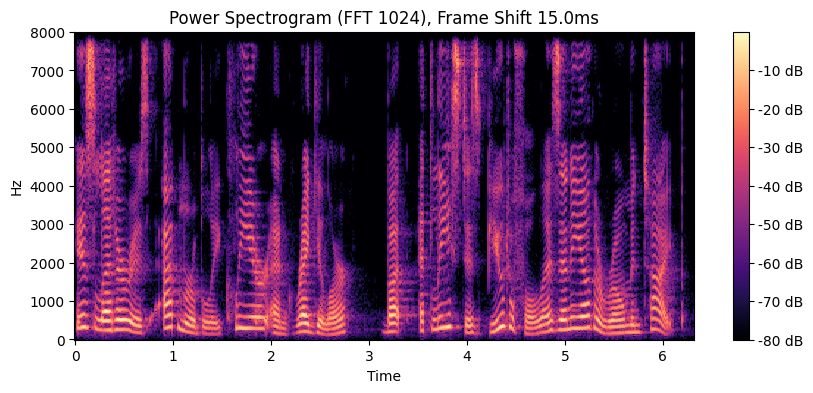

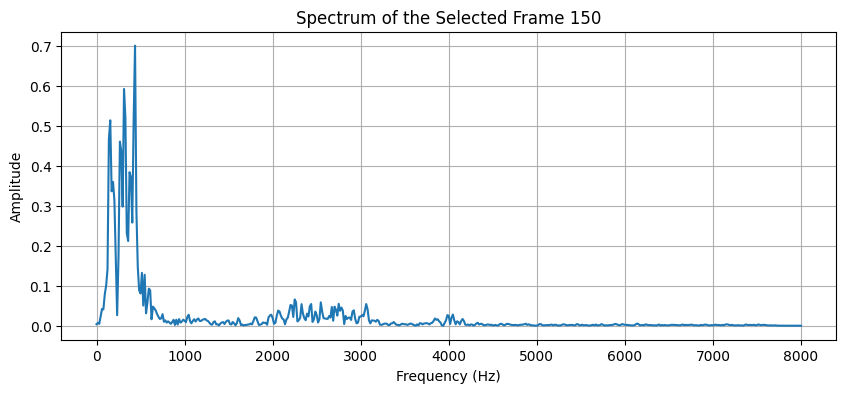

In [115]:
import requests
import tempfile
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

if r.status_code == 200:
    with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
        tmp_file.write(r.content)
        tmp_filepath = tmp_file.name

    y, sr = librosa.load(tmp_filepath, sr=16000)

    import os
    os.remove(tmp_filepath)
else:
    print(f"Failed to retrieve the audio file. Status code: {r.status_code}")

frameshifts = [0.005, 0.01, 0.015]
window_size = 0.03
fft_size = 1024
for frameshift in frameshifts:
  hop_length = int(frameshift * sr)

  win_length = int(window_size * sr)

  fft_result = librosa.stft(y, n_fft=1024, hop_length=hop_length, win_length=int(window_size*sr))

  power_specgram = np.abs(fft_result)**2

  power_specgram_db = librosa.power_to_db(power_specgram, ref=np.max)

  plt.figure(figsize=(10, 4))
  librosa.display.specshow(power_specgram_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
  plt.title(f'Power Spectrogram (FFT 1024), Frame Shift {frameshift*1000}ms')
  plt.colorbar(format='%+2.0f dB')
  plt.show()

n_fft = 1024
hop_length = int(0.01 * sr)  # 10 ms frameshift
spectrogram = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

frame_number = 150

selected_frame_spectrum = np.abs(spectrogram[:, frame_number])

plt.figure(figsize=(10, 4))
plt.plot(librosa.fft_frequencies(sr=sr, n_fft=n_fft), selected_frame_spectrum)
plt.title(f'Spectrum of the Selected Frame {frame_number}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## (2) [10 marks] Record yourself

Record yourself to read the following script, which is the same as LJ001-0048.wav. Then, resample your recording to 16 kHz and 16-bit depth.

`his letter is admirably clear and regular, but at least as beautiful as any other Roman type.`

You can use your phone to record and upload to GitHub.

In [116]:
# Write your implementation here
!pip install torch>=1.2.0     #install torch
!pip install torchaudio       #install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa          #install librosa



In [117]:
!git clone https://github.com/russderrick/CSC3160-assignment1.git

fatal: destination path 'CSC3160-assignment1' already exists and is not an empty directory.


In [118]:
import os
import librosa
import soundfile as sf

audio_path = '/content/CSC3160-assignment1/record.wav'
y, sr = librosa.load(audio_path, sr=None)

target_sr = 16000
target_dtype = 'int16'

y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
y_resampled = (y_resampled * (2**15)).astype(target_dtype)

save_path = '/content/CSC3160-assignment1/new_audio.wav'
sf.write(save_path, y_resampled, target_sr)
print(f'Resampled audio saved at {save_path}')

Resampled audio saved at /content/CSC3160-assignment1/new_audio.wav


## (3) [20 marks] Fundamental frequency

Extract the fundamental frequency (F0) trajectory of the provided speech sample and your own recording, and calculate the mean of your fundamental frequency trajectory. Both audio samples need to at 16 kHz, and the hop length should 160.

In this task, you need to:
* Plot the fundamental frequency trajectory and the F0 mean of the provided speech sample
* Plot the fundamental frequency trajectory and the F0 mean of your own recording

You can use the [API from librosa](https://librosa.org/doc/main/generated/librosa.pyin.html).

In [119]:
# Write your implementation here
!pip install torch>=1.2.0     #install torch
!pip install torchaudio       #install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa          #install librosa


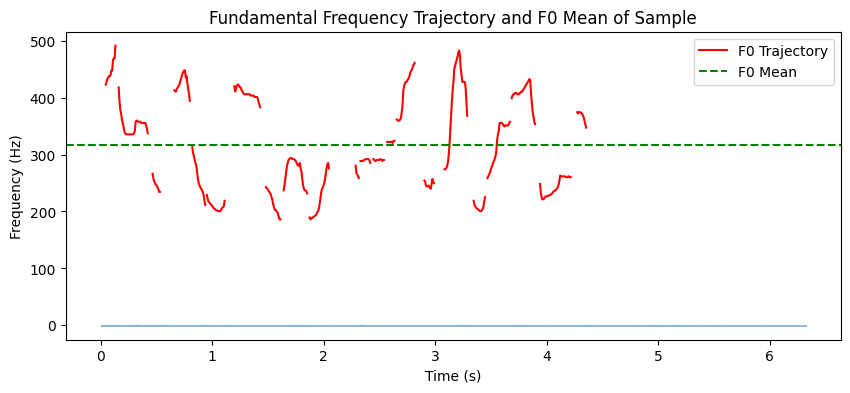

F0 Mean: 316.49023845631547 Hz


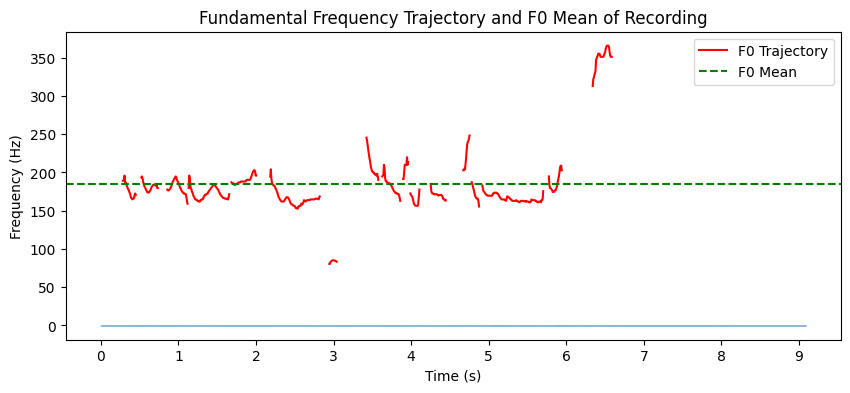

F0 Mean: 184.3432135535443 Hz


In [120]:
import requests
import tempfile
import librosa
import librosa.display
import matplotlib.pyplot as plt

url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
r = requests.get(url)

if r.status_code == 200:
    with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
        tmp_file.write(r.content)
        tmp_filepath = tmp_file.name

    y, sr = librosa.load(tmp_filepath, sr=16000)

    import os
    os.remove(tmp_filepath)

else:
    print(f"Failed to retrieve the audio file. Status code: {r.status_code}")


audio_path = '/content/CSC3160-assignment1/record.wav'
y_record, sr_record = librosa.load(audio_path, sr=16000)

f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), hop_length=160)

f0_mean = f0[f0 > 0].mean()

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(librosa.times_like(f0, hop_length=160), f0, label='F0 Trajectory', color='red')
plt.axhline(y=f0_mean, color='green', linestyle='--', label='F0 Mean')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Fundamental Frequency Trajectory and F0 Mean of Sample')
plt.show()
print(f'F0 Mean: {f0_mean} Hz')

f0_record, voiced_flag_record, voiced_probs_record = librosa.pyin(y_record, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), hop_length=160)

f0_mean_record = f0_record[f0_record > 0].mean()

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_record, sr=sr_record, alpha=0.5)
plt.plot(librosa.times_like(f0_record, hop_length=160), f0_record, label='F0 Trajectory', color='red')
plt.axhline(y=f0_mean_record, color='green', linestyle='--', label='F0 Mean')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Fundamental Frequency Trajectory and F0 Mean of Recording')
plt.show()
print(f'F0 Mean: {f0_mean_record} Hz')

## (4) [30 marks] Dynamic time warping

Now you have the reference speech (https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav) and your own recording. Their lengths are different. In some tasks, we need to align the speech to have same length. Please use Dynamic Time Warping to align your recording and reference speech sample. You need to align them by using the power spectrogram.

Here are your tasks:
* Visualize the aligned power spectrogram of the reference speech and your own recording
* Visualize the wraped path/map from the DTW algorithm. [Here](https://raw.githubusercontent.com/cbellei/DTW/master/DTW.png) is how the wraped path may look like.

You can use [FastDTW](https://github.com/slaypni/fastdtw) tool to align them.




In [121]:
!pip install torch>=1.2.0     #install torch
!pip install torchaudio       #install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa          #install librosa
!pip install fastdtw

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=516
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=517
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


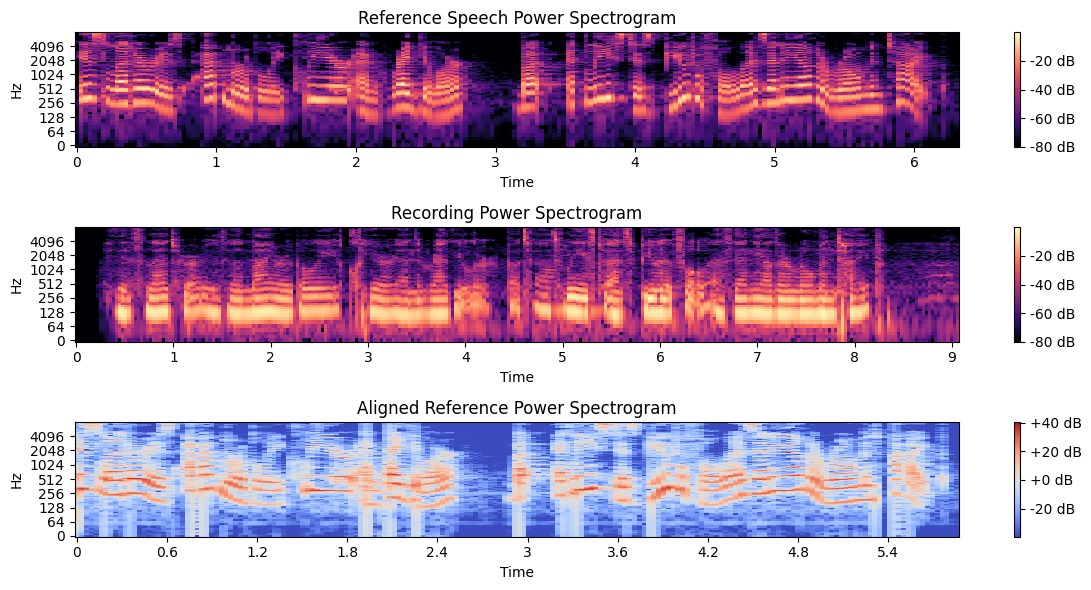

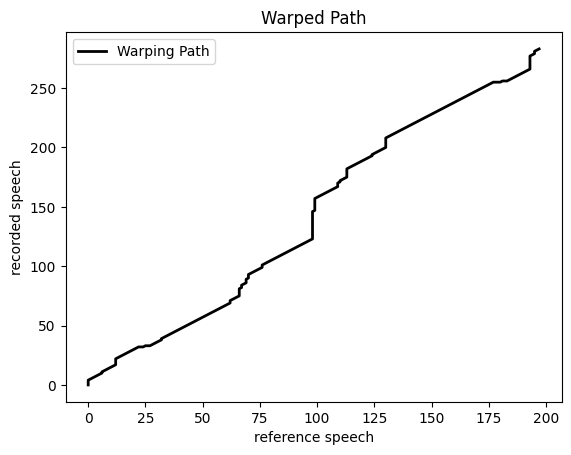

In [122]:
# Write your implementation here
import requests
import tempfile
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from scipy.interpolate import interp1d

url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
r = requests.get(url)

if r.status_code == 200:
    with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
        tmp_file.write(r.content)
        tmp_filepath = tmp_file.name

    y_reference, sr_reference = librosa.load(tmp_filepath, sr=16000)

    import os
    os.remove(tmp_filepath)

else:
    print(f"Failed to retrieve the audio file. Status code: {r.status_code}")


recording_path = '/content/CSC3160-assignment1/record.wav'  # Replace with the actual path

y_recording, sr_recording = librosa.load(recording_path, sr=16000)

fft_result_recording = librosa.stft(y_recording, n_fft=1024, hop_length=512, win_length=int(0.03*sr_recording))
fft_result_reference = librosa.stft(y_reference, n_fft=1024, hop_length=512, win_length=int(0.03*sr_reference))

power_spec_recording = np.abs(fft_result_recording)**2
power_spec_reference = np.abs(fft_result_reference)**2

alignment,wp = fastdtw(power_spec_recording.T, power_spec_reference.T,dist=euclidean)

s1 = np.array(list(([x[0] for x in wp])))
s2 = np.array(list(([x[1] for x in wp])))
y_reference_n = [y_reference[0]]
y_reference_new = np.array(y_reference_n)
p = 1
q = 1
for i in range(len(s1)-1):
    r1 = (s1[i+1] - s1[i])
    if r1 == 0 and q == 1:
        p+=1    #jiasu
        continue
    r2 = (s2[i+1]-s2[i])
    if r2 == 0 and p == 1:
        q+=1
        continue

    r = q / p
    q = 1
    p = 1
    old_start = int(((s2[i] + 1) * (101168 / 196)))
    old_end = int((s2[i+1] + 1) * (101168 / 196))
    old = y_reference[old_start:old_end]
    new = librosa.effects.time_stretch(old, rate = r)
    y_reference_new = np.concatenate((y_reference_new, new))

power_spec_aligned_reference = np.abs(librosa.stft(y_reference_new))**2
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.power_to_db(power_spec_reference, ref=np.max), sr=sr_reference, hop_length=512, x_axis='time', y_axis='log')
plt.title('Reference Speech Power Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.power_to_db(power_spec_recording, ref=np.max), sr=sr_recording, hop_length=512, x_axis='time', y_axis='log')
plt.title('Recording Power Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.power_to_db(power_spec_aligned_reference), sr=sr_recording, hop_length=512, x_axis='time', y_axis='log')
plt.title('Aligned Reference Power Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

wp_array = np.array(wp)
plt.plot(wp_array[:, 1], wp_array[:, 0], label='Warping Path', color='black', linewidth=2)
plt.xlabel('reference speech')
plt.ylabel('recorded speech')
plt.title('Warped Path')
plt.legend()
plt.show()

## (5) [20 marks] Applications

Please write 5 application usecases that the speech technology can potentially help with, and give your reasons.

For example
- Speech disorder: a speech-to-speech conversion model that can convert disordered speech to normal speech.


**Note: Maximum 500 words.**

```
# Write your summary here (200-300 words)
```
1.Driving navigation:use speech technology to guide drivers for easier driving and help them concentrate.
2.Music production:use artificial sound to create certain effects in music and polish singers' voices for better effects.   
3.Smart speaker assistant:help users with man-machine interaction such as light control and temperature control by oral instruction and communication with users.   
4.Criminal detection:help the police to judge a criminal commiting a crime or not by using a machine based on speech model which may detect certain changes with one's voice when telling lies.    
5.Pet industry:use a animal speech transformation model to tell the current emotion the animal wants to express.
